# 7장 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## #.이산확률분포

### 이산확률변수에서 다룬 내용(함수)

- 상태공간



In [2]:
# ex:두 주사위 눈이 차의 절대값
d1 = [1,2,3,4,5,6]
d2 = [1,2,3,4,5,6]

X = list()
for i in d1:
    for j in d2:
        X.append(abs(i-j))
        
x_set = np.array(list(set(X)))
x_set

array([0, 1, 2, 3, 4, 5])

In [3]:
x_set = np.array([0,1])
x_set

array([0, 1])

- 확률질량함수: f(x)

In [4]:
def f(x):
    cnt = 0
    for i in d1:
        for j in d2:
            if abs(i-j) == x:
                cnt += 1
    return cnt / (len(d1)*len(d2))

- 확률변수

In [5]:
X = [x_set, f]

-  확률

In [6]:
prob = np.array([ f(x_k) for x_k in x_set])
prob

array([0.16666667, 0.27777778])

--------------------------------------------------------

- 평균=기대값(E(X))

In [7]:
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])

In [8]:
#g(x) 함수식 사용
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

- 분산(V(X))

In [9]:
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

In [10]:
#g(x) 함수식 사용
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

- 확률을 이용한 기대값과 분산 출력

In [11]:
#확률을 이용한 기대값과 분산 출력
def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])  
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')

- 확률분포 그래프

In [12]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red') #기대값:평균
    ax.set_xticks(np.append(x_set, E(X)))  #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)         #y축의 한계 지정
    ax.legend()
    
    plt.show()      

### 1.베르누이 분포(Bernoulli distribution)


In [13]:
def Bern(p):
    x_set = np.array([0,1])
    
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    print(f(1))    
    return x_set, f

In [14]:
p = 1 / 4
X = Bern(p)
X

0.25


(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [33]:
check_prob(X)

기대값 E(X): 0.25
분산   V(X): 0.1875


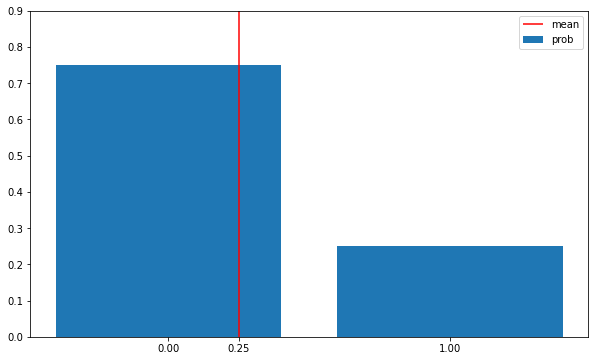

In [34]:
plot_prob(X)

### 2.이항분포(binomial distributuin)

In [37]:
import scipy
scipy.__version__

'1.5.2'

In [38]:
#scipy패키지의 special모듈에 있는 comb함수 사용
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [60]:
n = 20       # n의 개수를 크게 해보기 --> 그래프가 종모양으로 변경됨
p = 0.6      # p의 값을 0 ~ 1 사이값으로 변경해서 그래프의 변화 보기
X = Bin(n,p)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <function __main__.Bin.<locals>.f(x)>)

In [61]:
check_prob(X)

기대값 E(X): 12.0
분산   V(X): 4.8


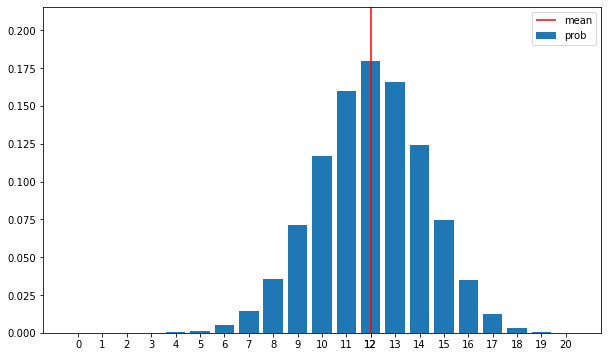

In [62]:
plot_prob(X)

## 2.연속확률분포

### 연속확률변수에서 다룬 내용(함수)

- 상태구간

In [71]:
x_range = np.array([0,4])
x_range

array([0, 4])

- 확률밀도함수

In [72]:
def f(x):
    if x_range[0] < x <= x_range[1]:
        return (1/8*x)
    else:
        return 0

- 확률변수

In [73]:
X = [x_range, f]

- 확률(면적) 구하기

In [74]:
from scipy import integrate

integrate.quad(f,2,3)  #f:피적분함수, 2,3: 적분범위   
#결과값: (0.3125, 3.469446951953614e-15)=(적분값, 추정오차)

(0.3125, 3.469446951953614e-15)

- 기대값

In [75]:
def E(X, g=lambda x:x):
    x_range, f = X
    
    def integrand(x):
        return g(x) * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]

E(X)

2.66666666666506

- 분산

In [76]:
def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]

V(X)

0.8888888888899126

In [77]:
def check_prob(X):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f,-np.inf,np.inf), 4)
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')    
    
check_prob(X)

기대값 E(X): 2.667
분산   V(X): 0.8889


- 확률

In [78]:
def get_prob(X, a, b):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, a, b), 4)
    
    print(f'확률: {prob_sum[0]}')

- 누적분포함수

In [79]:
def F(x):
    return integrate.quad(f,-np.inf, x)[0]    #(-np.inf, np.inp: 무한대)

F(3) - F(2)

0.3124999999999945

- 그래프(구간 색칠하기)

In [80]:
def plot_prob(X, x_min, x_max):
    x_range, f = X
    
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
        
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    
    
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray', linestyle='--')
    ax.legend()

    plt.show()   


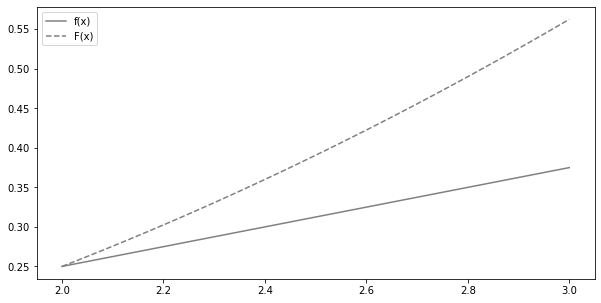

In [81]:
plot_prob(X, 2, 3)

### 1. 정규분포

In [95]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    
    def f(x):
        return 1 / (np.sqrt(2*np.pi) * sigma) * np.exp(-(x-mu)**2 / 2 * sigma**2)
    
    return x_range, f

In [99]:
mu, sigma =  5, 0.5
X = N(mu, sigma)

In [100]:
#기대값과 분산
check_prob(X)

기대값 E(X): 20.0
분산   V(X): 916.0


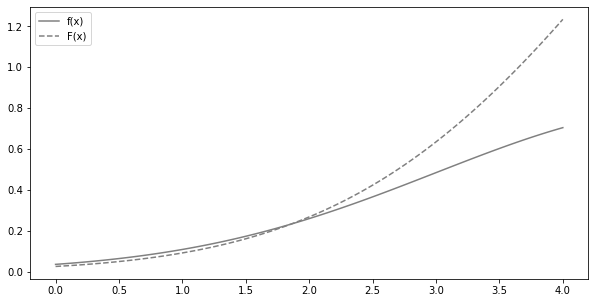

In [101]:
#정규분포 그래프: P(a <= X <= b)
plot_prob(X, 0, 4)